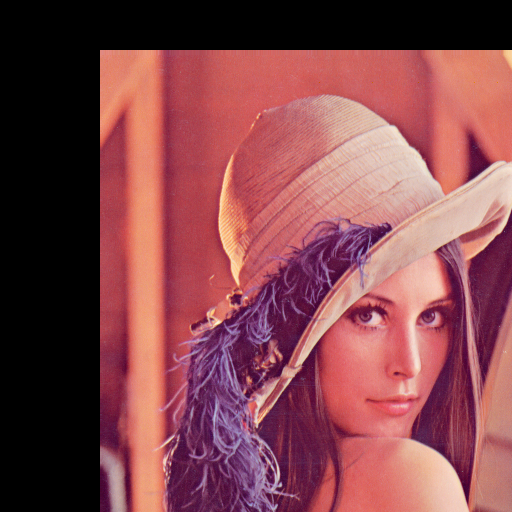

Translated Image Displayed


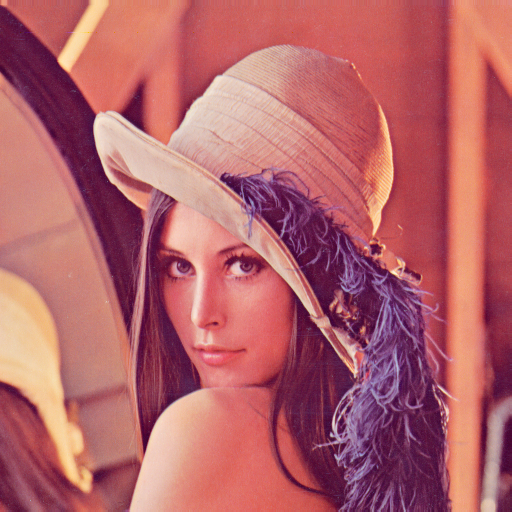

Reflected Image Displayed


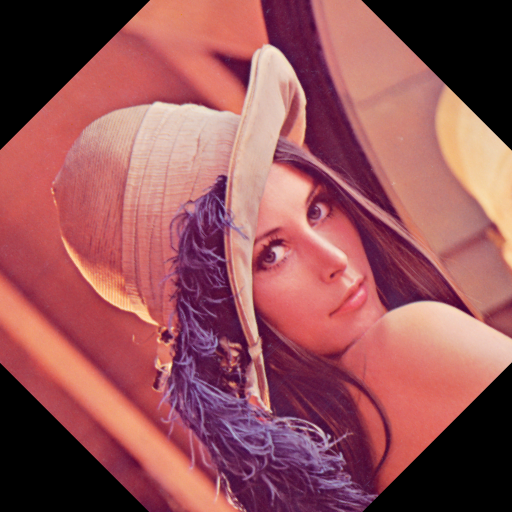

Rotated Image Displayed


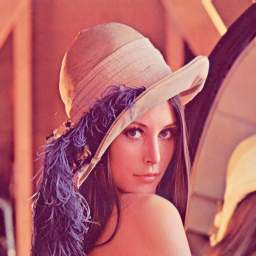

Scaled Image Displayed


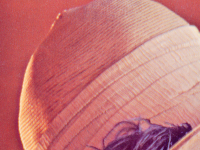

Cropped Image Displayed


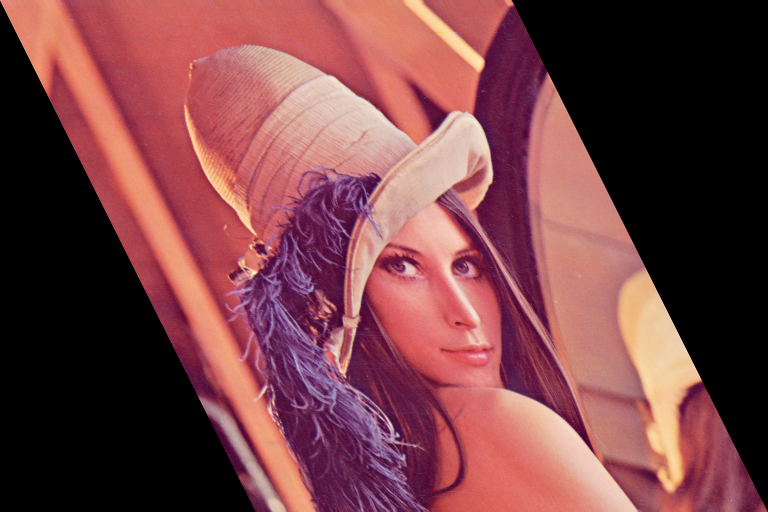

Sheared Image (x-axis) Displayed


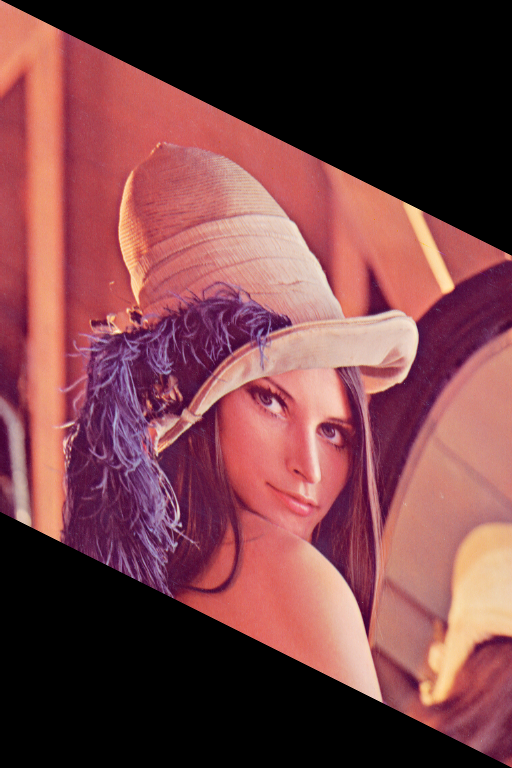

Sheared Image (y-axis) Displayed


In [9]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import cv2
# Load the Lena image
image_path = "/content/Lena_Image.png"
image = cv2.imread(image_path)

# Image Translation
rows, cols, _ = image.shape
translation_matrix = np.float32([[1, 0, 100], [0, 1, 50]])
translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
cv2_imshow(translated_image)
print("Translated Image Displayed")

# Image Reflection
reflected_image = cv2.flip(image, 1)
cv2_imshow(reflected_image)
print("Reflected Image Displayed")

# Image Rotation
rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
cv2_imshow(rotated_image)
print("Rotated Image Displayed")

# Image Scaling
scaled_image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
cv2_imshow(scaled_image)
print("Scaled Image Displayed")

# Image Cropping
cropped_image = image[50:200, 100:300]
cv2_imshow(cropped_image)
print("Cropped Image Displayed")

# Shearing in x-axis
M_shear_x = np.float32([[1, 0.5, 0], [0, 1, 0]])
sheared_x = cv2.warpAffine(image, M_shear_x, (int(cols * 1.5), rows))
cv2_imshow(sheared_x)
print("Sheared Image (x-axis) Displayed")

# Shearing in y-axis
M_shear_y = np.float32([[1, 0, 0], [0.5, 1, 0]])
sheared_y = cv2.warpAffine(image, M_shear_y, (cols, int(rows * 1.5)))
cv2_imshow(sheared_y)
print("Sheared Image (y-axis) Displayed")


In [10]:
def apply_transformation(vertices, transformation_matrix):
    """Apply a transformation to a set of vertices."""
    transformed_vertices = np.dot(transformation_matrix, vertices.T).T
    return transformed_vertices

# Define the 2D object: a rectangle
rectangle = np.array([[0, 0], [2, 0], [2, 1], [0, 1], [0, 0]])  # Rectangle vertices
rectangle_homogeneous = np.hstack((rectangle, np.ones((rectangle.shape[0], 1))))  # Convert to homogeneous coordinates

# **1. Translation**
tx, ty = 3, 2  # Translate by (3, 2)
translation_matrix = np.array([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
])
translated_rectangle = apply_transformation(rectangle_homogeneous, translation_matrix)

# **2. Scaling**
sx, sy = 2, 1.5  # Scale by (2, 1.5)
scaling_matrix = np.array([
    [sx, 0, 0],
    [0, sy, 0],
    [0, 0, 1]
])
scaled_rectangle = apply_transformation(rectangle_homogeneous, scaling_matrix)

# **3. Rotation**
theta = np.radians(45)  # Rotate by 45 degrees
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])
rotated_rectangle = apply_transformation(rectangle_homogeneous, rotation_matrix)

# **4. Reflection**
reflection_matrix_x = np.array([
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]
])  # Reflection across the x-axis
reflected_rectangle = apply_transformation(rectangle_homogeneous, reflection_matrix_x)

# **5. Shearing**
shx, shy = 1, 0.5  # Shear along x and y axes
shearing_matrix = np.array([
    [1, shx, 0],
    [shy, 1, 0],
    [0, 0, 1]
])
sheared_rectangle = apply_transformation(rectangle_homogeneous, shearing_matrix)

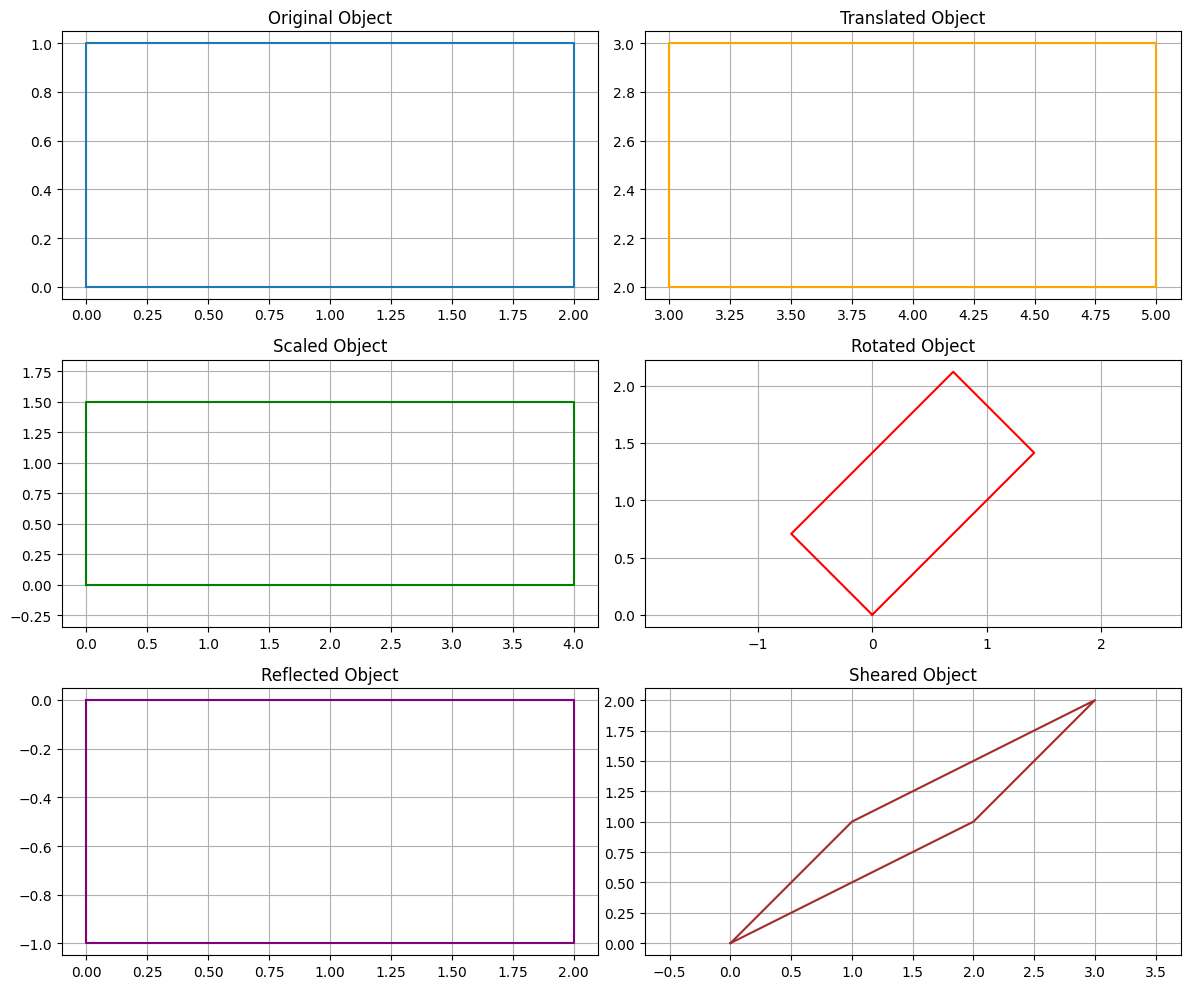

In [11]:
# **Plot the results**
plt.figure(figsize=(12, 10))

# Original object
plt.subplot(321)
plt.plot(rectangle[:, 0], rectangle[:, 1], label="Original")
plt.title("Original Object")
plt.axis("equal")
plt.grid(True)

# Translated object
plt.subplot(322)
plt.plot(translated_rectangle[:, 0], translated_rectangle[:, 1], label="Translated", color="orange")
plt.title("Translated Object")
plt.axis("equal")
plt.grid(True)

# Scaled object
plt.subplot(323)
plt.plot(scaled_rectangle[:, 0], scaled_rectangle[:, 1], label="Scaled", color="green")
plt.title("Scaled Object")
plt.axis("equal")
plt.grid(True)

# Rotated object
plt.subplot(324)
plt.plot(rotated_rectangle[:, 0], rotated_rectangle[:, 1], label="Rotated", color="red")
plt.title("Rotated Object")
plt.axis("equal")
plt.grid(True)

# Reflected object
plt.subplot(325)
plt.plot(reflected_rectangle[:, 0], reflected_rectangle[:, 1], label="Reflected", color="purple")
plt.title("Reflected Object")
plt.axis("equal")
plt.grid(True)

# Sheared object
plt.subplot(326)
plt.plot(sheared_rectangle[:, 0], sheared_rectangle[:, 1], label="Sheared", color="brown")
plt.title("Sheared Object")
plt.axis("equal")
plt.grid(True)

plt.tight_layout()
plt.show()